<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

<AxesSubplot:xlabel='MEDV'>

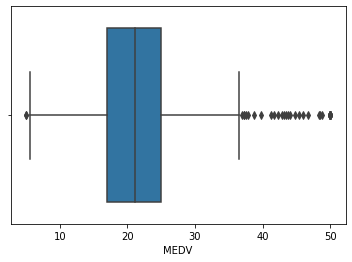

In [4]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(boston_df, x='MEDV')

<AxesSubplot:xlabel='CHAS'>

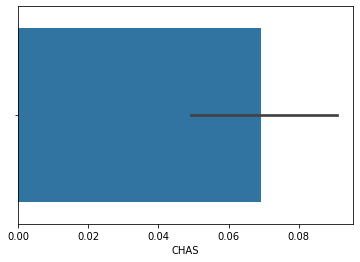

In [5]:
#Provide a  bar plot for the Charles river variable
sns.barplot(boston_df, x='CHAS')

<AxesSubplot:xlabel='AGE', ylabel='AGE_GROUP'>

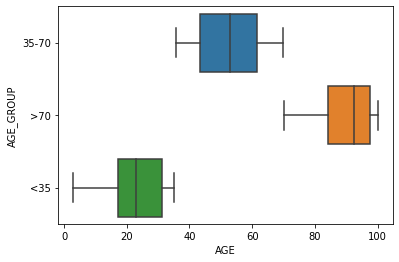

In [10]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_GROUP'] = np.where(boston_df['AGE']>35, np.where(boston_df['AGE']>70, '>70', '35-70'), '<35')
sns.boxplot(boston_df, x='AGE', y='AGE_GROUP')

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

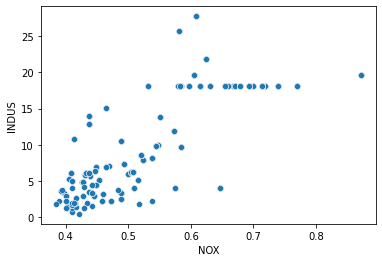

In [ ]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

# COMMENT: In the areas of lower industrialization, the NOX concentration is lower


<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

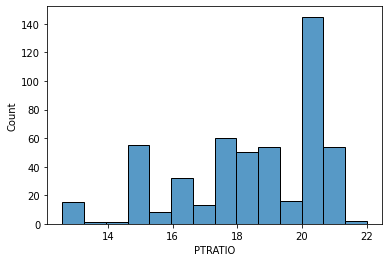

In [12]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x='PTRATIO')

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [13]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70


In [ ]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
median_by_the_river = boston_df['MEDV'].loc[boston_df['CHAS']==1]
median_NOT_by_the_river = boston_df['MEDV'].loc[boston_df['CHAS']==0]

from scipy.stats import median_test
res = median_test(median_by_the_river, median_NOT_by_the_river)
res

#COMMENT: We reject null hypothesis, therefore there IS a diference in the median value

MedianTestResult(statistic=8.271903391340615, pvalue=0.004026327394058504, median=21.2, table=array([[ 26, 224],
       [  9, 247]], dtype=int64))

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
low = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='<35']
mid = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='35-70']
hi = boston_df['MEDV'].loc[boston_df['AGE_GROUP']=='>70']

f_stats, p_value = scipy.stats.f_oneway(low,mid,hi,axis=0)
f_stats, p_value 

#COMMENT: There is a statistical significancy when it comes to the age group and the median value of the household

(36.40764999196599, 1.7105011022702984e-15)

In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
pearson,p_value

#COMMENT:There is a relationship between these two values, scatter plot below also indicates that

(0.7636514469209157, 7.913361061233745e-98)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

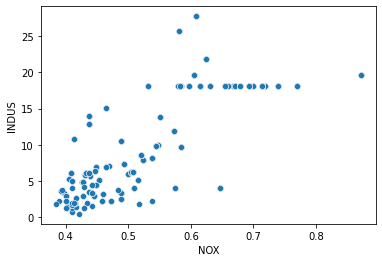

In [22]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

In [ ]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)